In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [5]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid())
model2 = nn.Sequential(nn.Linear(2, 4),
                      nn.ReLU(),
                      nn.Linear(4, 4),
                      nn.ReLU(),
                      nn.Linear(4, 1),
                      nn.Sigmoid())
model3 = nn.Sequential(nn.Linear(2, 1),
                       nn.Sigmoid())

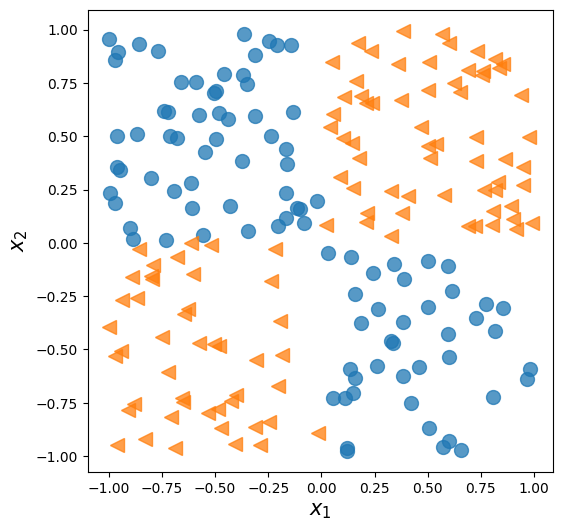

In [6]:
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [7]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [8]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
        accuracy_hist_train, accuracy_hist_valid
history = train(model, num_epochs, train_dl, x_valid, y_valid)
print(history)

([0.3506264501810074, 0.3504732245206833, 0.3503345811367035, 0.3501992928981781, 0.3500541636347771, 0.3499128744006157, 0.3497753757238388, 0.34964885652065275, 0.3495030957460403, 0.34939058870077133, 0.3492737877368927, 0.3491488328576088, 0.34903048127889635, 0.34890778541564943, 0.34879646509885787, 0.3486880439519882, 0.34856716334819793, 0.3484782499074936, 0.3483768534660339, 0.3482716044783592, 0.34815858691930773, 0.3480800637602806, 0.34798115730285645, 0.3478814479708672, 0.3477880993485451, 0.34769824117422105, 0.3476034653186798, 0.3475068837404251, 0.3474224582314491, 0.3473476514220238, 0.34726590901613236, 0.34718231827020646, 0.34710360258817674, 0.3470274370908737, 0.34694739818573, 0.34686959952116014, 0.3468021208047867, 0.3467374977469444, 0.3466669201850891, 0.34658669859170915, 0.34652378410100937, 0.34645876169204715, 0.34639940679073333, 0.3463366311788559, 0.3462697285413742, 0.3462177938222885, 0.3461577722430229, 0.34608740240335467, 0.3460277184844017, 0.

Text(0.5, 0, 'Epochs')

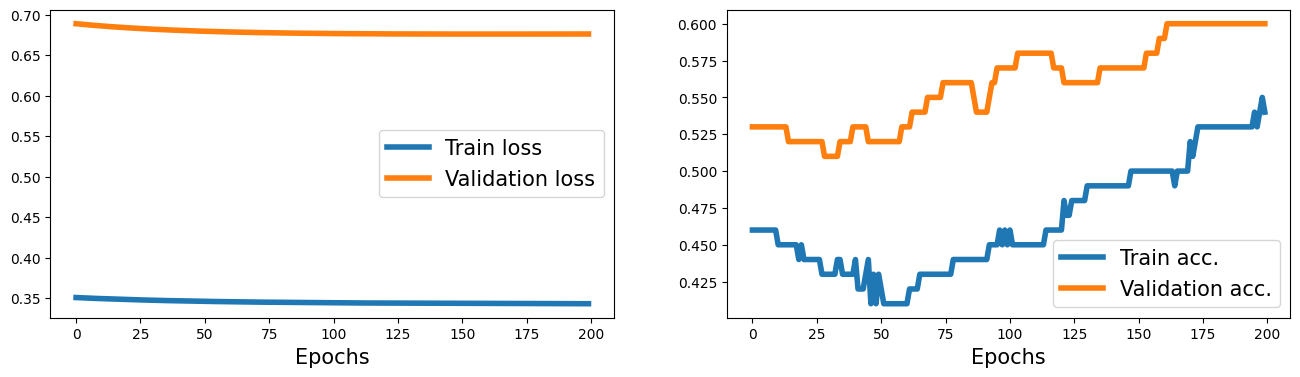

In [10]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [11]:
model = nn.Sequential(
nn.Linear(2, 4),
nn.ReLU(),
nn.Linear(4, 4),
nn.ReLU(),
nn.Linear(4, 1),
nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

Text(0.5, 0, 'Epochs')

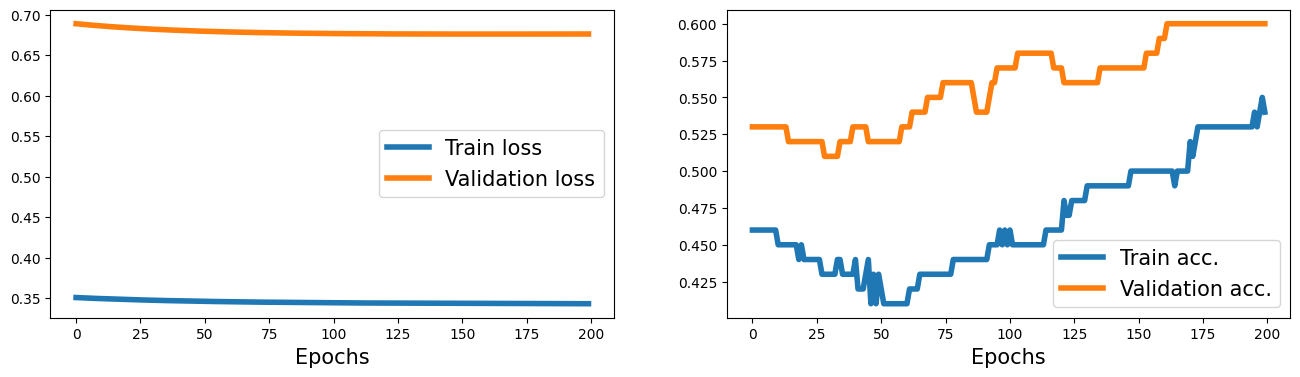

In [12]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [13]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/' \
'machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names,
na_values = "?", comment='\t',
sep=" ", skipinitialspace=True)
## drop the NA rows
df = df.dropna()
df = df.reset_index(drop=True)
## train/test splits:
import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(
df, train_size=0.8, random_state=1
)
train_stats = df_train.describe().transpose()
numeric_column_names = [
'Cylinders', 'Displacement',
'Horsepower', 'Weight',
'Acceleration'
]

In [14]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = \
        (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = \
        (df_test_norm.loc[:, col_name] - mean)/std
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


In [15]:
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(
v, boundaries, right=True
)
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(
v, boundaries, right=True
)
numeric_column_names.append('Model Year Bucketed')

In [16]:
from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(
    df_train_norm['Origin'].values) % total_origin)
x_train_numeric = torch.tensor(
    df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
origin_encoded = one_hot(torch.from_numpy(
    df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(
    df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [17]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

In [18]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [19]:
hidden_units = [8, 4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [20]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [21]:
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss '
            f'{loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 536.1047
Epoch 20 Loss 8.4361
Epoch 40 Loss 7.8695
Epoch 60 Loss 7.1891
Epoch 80 Loss 6.7064
Epoch 100 Loss 6.7603
Epoch 120 Loss 6.3107
Epoch 140 Loss 6.6884
Epoch 160 Loss 6.7549
Epoch 180 Loss 6.2029


In [22]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')
    #203	28.0	-0.824303	-0.901020	-0.736562	-0.950031	0.255202	76	3
    # [28., -0.824303, -0.901020, -0.736562, -0.950031, 0.255202, 76., 3]

    #tor = torch.tensor([28., -0.824303, -0.901020, -0.736562, -0.950031, 0.255202, 76., 3])
    #print(model(tor))

Test MSE: 9.5907
Test MAE: 2.1177


# <font color='#0398fc'>Image</font>

In [23]:
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_dataset = torchvision.datasets.MNIST(
    root=image_path, train=True,
    transform=transform, download=False)
mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path, train=False,
    transform=transform, download=False)
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

In [24]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
torch.manual_seed(1)
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (
        torch.argmax(pred, dim=1) == y_batch
        ).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f'Epoch {epoch} Accuracy '
          f'{accuracy_hist_train:.4f}')

Epoch 0 Accuracy 0.8531
Epoch 1 Accuracy 0.9287
Epoch 2 Accuracy 0.9413
Epoch 3 Accuracy 0.9506
Epoch 4 Accuracy 0.9558
Epoch 5 Accuracy 0.9592
Epoch 6 Accuracy 0.9627
Epoch 7 Accuracy 0.9650
Epoch 8 Accuracy 0.9674
Epoch 9 Accuracy 0.9690
Epoch 10 Accuracy 0.9710
Epoch 11 Accuracy 0.9729
Epoch 12 Accuracy 0.9739
Epoch 13 Accuracy 0.9750
Epoch 14 Accuracy 0.9764
Epoch 15 Accuracy 0.9777
Epoch 16 Accuracy 0.9779
Epoch 17 Accuracy 0.9798
Epoch 18 Accuracy 0.9807
Epoch 19 Accuracy 0.9812


In [26]:
pred = model(mnist_test_dataset.data / 255.)
is_correct = (torch.argmax(pred, dim=1) ==mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.sum()} / {len(mnist_test_dataset.data)}')
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 9651.0 / 10000
Test accuracy: 0.9651


Test accuracy: 9.0000 / 10


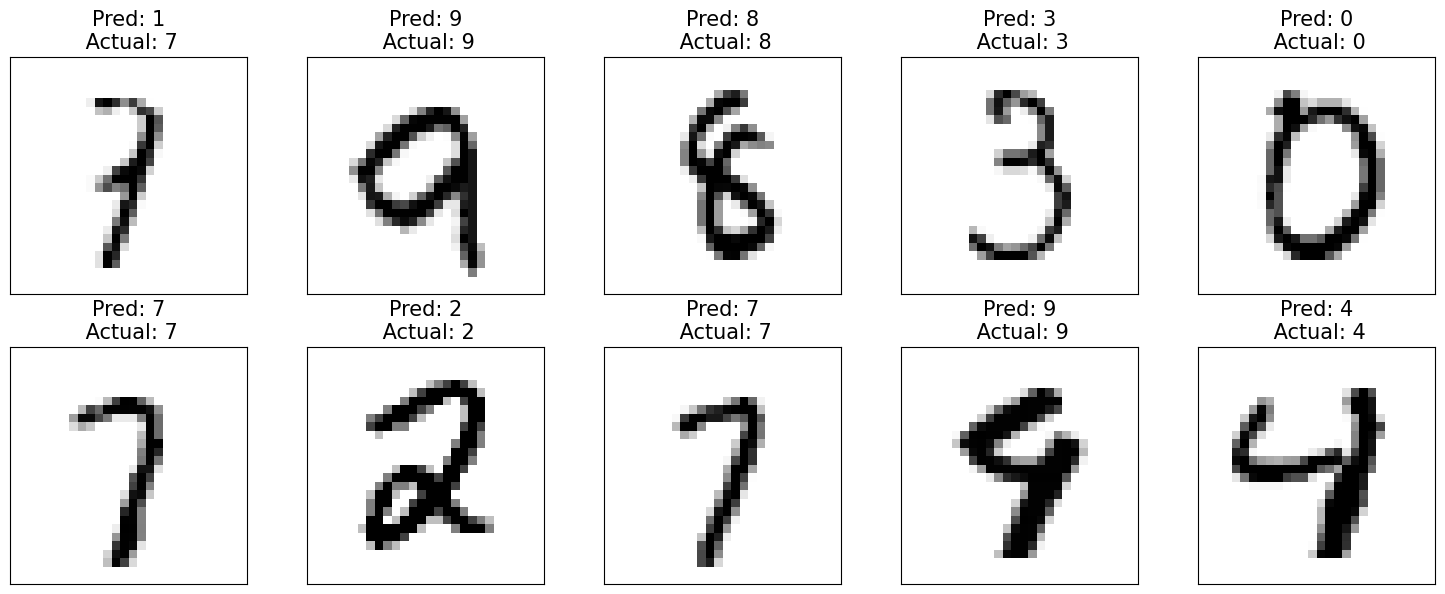

In [63]:
start_index = 1500
sample_size = 10
img_test = mnist_test_dataset.data[start_index:start_index + sample_size] / 255.
img_label = mnist_test_dataset.targets[start_index:start_index + sample_size]

pred = model(img_test)
pred_val = torch.argmax(pred, dim=1)
is_correct = (torch.argmax(pred, dim=1) == img_label).float()
print(f'Test accuracy: {is_correct.sum():.4f} / {len(img_test)}')

fig = plt.figure(figsize=(15, 6))
for i in range(sample_size):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img_test[i], cmap='gray_r')
    ax.set_title(f'Pred: {pred_val[i]}\n Actual: {img_label[i]}', size=15)
fig.tight_layout()
plt.show()

Test accuracy: 6.0000 / 10


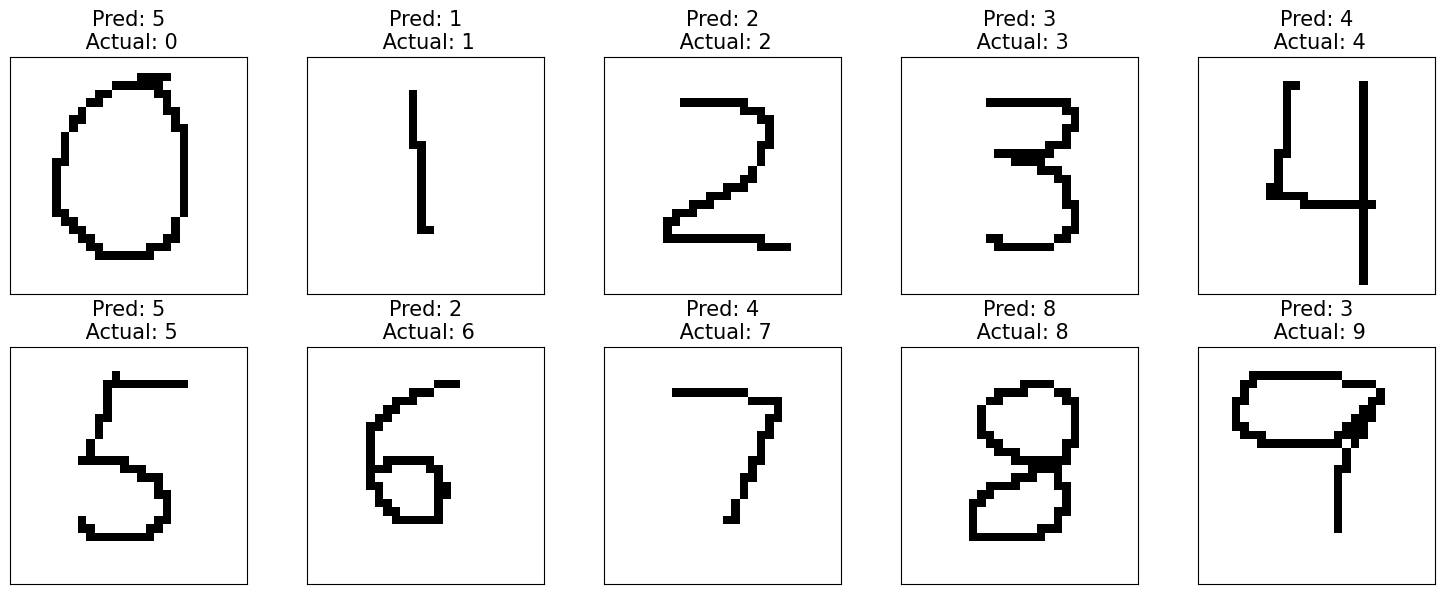

In [151]:
from os import getcwd
from PIL import Image

imgs = []
for i in range(10):
    img = Image.open(f"{getcwd()}/MyNumbers/{i}.png")
    img.load()
    img_data = np.asarray(img)[:,:,0] #Remove the channels diminsion
    img_data = 255 - img_data # Invert the black(255) and white(0) colors, since the apparently are loaded wrong?
    imgs.append(img_data)

convert_tensor = transforms.ToTensor()
imgs_tensor = [convert_tensor(img) for img in imgs]
imgs_tensor = torch.stack(imgs_tensor, 0)

labels = [torch.tensor(i) for i in range(10)]
labels = torch.stack(labels, 0)

pred = model(imgs_tensor)
pred_val = torch.argmax(pred, dim=1)
is_correct = (torch.argmax(pred, dim=1) == labels).float()
print(f'Test accuracy: {is_correct.sum():.4f} / {len(labels)}')

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(imgs[i], cmap='gray_r')
    ax.set_title(f'Pred: {pred_val[i]}\n Actual: {labels[i]}', size=15)
fig.tight_layout()
plt.show()